# DS RISK HOMEWORK

## Импортируем библиотеки

In [1]:
from statistics import mean
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

## Загрузим данные

In [2]:
train = pd.read_csv('data/PD-data-train.csv', sep=';')
test = pd.read_csv('data/PD-data-test.csv', sep=';')
desc = pd.read_csv('data/PD-data-desc.csv', sep=';')

# Описание данных

In [3]:
desc.head()

,field,desc_eng,desc_rus
0,ar_revenue,Sales revenue (at the end of the last year),Выручка от реализации (на конец последнего года)
1,ar_total_expenses,Total expenses for the last year,Общие расходы за последний год
2,ar_sale_cost,Cost of sales (at the end of the last year),Себестоимость продаж (на конец последнего года)
3,ar_selling_expenses,Selling expenses (at the end of the last year),Коммерческие расходы (на конец последнего года)
4,ar_management_expenses,Administrative expenses (at the end of the las...,Управленческие расходы (на конец последнего года)


# Визуализация данных

## Первичный анализ

### Форма и вид сэмплов

In [4]:
train.head()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
0,7,52996000.0,48344000.0,48344000.0,0.0,0.0,4652000.0,-2608000.0,2044000.0,846000.0,...,3,3,3,[1-100],50000.0,2,0,0,0,0
1,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12,12,12,[1-100],10000.0,5,0,0,0,0
2,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28,28,28,[1-100],10000.0,2,0,0,0,0
3,22,32049000.0,29568000.0,29568000.0,0.0,0.0,2481000.0,-260000.0,2221000.0,302000.0,...,8,8,8,[1-100],300000.0,1,0,0,0,0
4,23,16458000.0,14935000.0,14935000.0,0.0,0.0,1523000.0,-274000.0,1249000.0,538000.0,...,27,27,27,[1-100],10000.0,2,0,0,0,0


In [5]:
train.shape

(32395, 37)

In [6]:
test.head()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg
0,196,39103000.0,38913000.0,38913000.0,0.0,0.0,190000.0,141000.0,331000.0,284000.0,...,135,3,3,3,[1-100],100000.0,1,0,0,0
1,1196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,138,5,5,5,[1-100],100000.0,1,0,0,0
2,2813,54174000.0,50929000.0,50929000.0,0.0,0.0,3245000.0,-1278000.0,1967000.0,500000.0,...,138,20,20,20,[1-100],250000.0,2,0,0,0
3,4385,1904000.0,1679000.0,1679000.0,0.0,0.0,225000.0,-88000.0,137000.0,0.0,...,139,9,9,9,[1-100],10000.0,2,0,0,0
4,6479,225584000.0,210685000.0,210685000.0,0.0,0.0,14899000.0,-12715000.0,2184000.0,445000.0,...,139,3,3,3,(100-500],1700598.0,84,0,0,0


In [7]:
test.shape

(200, 36)

### дефолт-рейт (отношение единиц к нулям)

In [8]:
train['default_12m'].values.mean()

0.06454699799351751

### количество уникальных объектов

In [9]:
train.record_id.nunique()

32395

In [10]:
test.record_id.nunique()

200

### количество null значений

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32395 entries, 0 to 32394
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     32395 non-null  int64  
 1   ar_revenue                    17250 non-null  float64
 2   ar_total_expenses             17250 non-null  float64
 3   ar_sale_cost                  17250 non-null  float64
 4   ar_selling_expenses           17250 non-null  float64
 5   ar_management_expenses        17250 non-null  float64
 6   ar_sale_profit                17250 non-null  float64
 7   ar_balance_of_rvns_and_expns  17250 non-null  float64
 8   ar_profit_before_tax          17250 non-null  float64
 9   ar_taxes                      17250 non-null  float64
 10  ar_other_profit_and_losses    17250 non-null  float64
 11  ar_net_profit                 17250 non-null  float64
 12  ab_immobilized_assets         17250 non-null  float64
 13  a

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     200 non-null    int64  
 1   ar_revenue                    82 non-null     float64
 2   ar_total_expenses             82 non-null     float64
 3   ar_sale_cost                  82 non-null     float64
 4   ar_selling_expenses           82 non-null     float64
 5   ar_management_expenses        82 non-null     float64
 6   ar_sale_profit                82 non-null     float64
 7   ar_balance_of_rvns_and_expns  82 non-null     float64
 8   ar_profit_before_tax          82 non-null     float64
 9   ar_taxes                      82 non-null     float64
 10  ar_other_profit_and_losses    82 non-null     float64
 11  ar_net_profit                 82 non-null     float64
 12  ab_immobilized_assets         82 non-null     float64
 13  ab_mo

больше половины признаков имеют около 50% null значений

### статистики данных

In [13]:
train.describe()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
count,32395.000000,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,...,32395.000000,32395.000000,32395.000000,32395.000000,3.239500e+04,32395.000000,32395.000000,32395.000000,32395.0,32395.000000
mean,136955.533601,8.153776e+07,7.678474e+07,7.320328e+07,2.499198e+06,1.082263e+06,4.753016e+06,-6.424773e+05,4.110538e+06,4.188071e+05,...,78.644822,15.010341,15.010341,15.010341,1.366509e+06,11.946535,0.021670,0.000093,0.0,0.064547
std,79370.573366,1.274402e+08,1.227227e+08,1.156651e+08,1.231798e+07,7.848929e+06,1.941027e+07,6.014715e+06,1.938021e+07,1.565298e+06,...,46.522534,9.546511,9.546511,9.546511,1.502438e+07,86.341847,0.342715,0.009623,0.0,0.245729
min,7.000000,0.000000e+00,-7.019840e+08,-5.072780e+08,-3.542900e+07,-1.921670e+08,-9.210000e+07,-7.581800e+07,-5.946600e+07,-1.681000e+07,...,0.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.0,0.000000
25%,67912.000000,1.019950e+07,9.130250e+06,8.844000e+06,0.000000e+00,0.000000e+00,2.112500e+05,-9.400000e+05,1.420000e+05,0.000000e+00,...,35.000000,6.000000,6.000000,6.000000,1.000000e+04,1.000000,0.000000,0.000000,0.0,0.000000
50%,137527.000000,3.233500e+07,2.970350e+07,2.840800e+07,0.000000e+00,0.000000e+00,1.231500e+06,-1.260000e+05,8.500000e+05,4.100000e+04,...,77.000000,14.000000,14.000000,14.000000,1.000000e+04,1.000000,0.000000,0.000000,0.0,0.000000
75%,205633.500000,8.887675e+07,8.309500e+07,7.991425e+07,0.000000e+00,0.000000e+00,4.574750e+06,0.000000e+00,3.543750e+06,2.910000e+05,...,133.000000,24.000000,24.000000,24.000000,3.000000e+04,2.000000,0.000000,0.000000,0.0,0.000000
max,274623.000000,7.946840e+08,7.949360e+08,7.624930e+08,2.746560e+08,3.023550e+08,1.434511e+09,1.584250e+08,1.481526e+09,5.420200e+07,...,149.000000,33.000000,33.000000,33.000000,1.584979e+09,998.000000,20.000000,1.000000,0.0,1.000000


In [14]:
test.describe()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,...,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg
count,200.000000,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,8.200000e+01,...,200.000000,200.000000,200.000000,200.000000,200.000000,2.000000e+02,200.000000,200.0,200.0,200.0
mean,135340.925000,8.625971e+07,8.200218e+07,7.694863e+07,2.780183e+06,2.273366e+06,4.257524e+06,-6.880854e+05,3.569439e+06,4.419878e+05,...,84.595000,65.680000,14.320000,14.320000,14.320000,7.263560e+05,5.070000,0.0,0.0,0.0
std,80177.086856,1.589030e+08,1.534092e+08,1.372651e+08,1.180692e+07,1.752820e+07,7.752518e+06,5.253569e+06,8.232787e+06,1.294710e+06,...,80.585115,46.096442,9.697308,9.697308,9.697308,4.043191e+06,32.669582,0.0,0.0,0.0
min,196.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.898000e+06,-2.328100e+07,-6.390000e+06,-1.100000e+04,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,0.0,0.0,0.0
25%,68367.500000,6.779250e+06,5.397500e+06,5.397500e+06,0.000000e+00,0.000000e+00,1.557500e+05,-6.570000e+05,1.265000e+05,0.000000e+00,...,25.000000,25.000000,5.000000,5.000000,5.000000,1.000000e+04,1.000000,0.0,0.0,0.0
50%,127585.500000,1.899700e+07,1.645600e+07,1.587850e+07,0.000000e+00,0.000000e+00,1.184000e+06,-5.800000e+04,5.450000e+05,7.350000e+04,...,57.000000,54.500000,12.500000,12.500000,12.500000,1.000000e+04,1.000000,0.0,0.0,0.0
75%,202665.000000,8.388250e+07,7.831350e+07,7.651175e+07,0.000000e+00,0.000000e+00,3.200000e+06,0.000000e+00,2.630500e+06,3.525000e+05,...,106.000000,101.250000,24.000000,24.000000,24.000000,2.055575e+04,2.000000,0.0,0.0,0.0
max,271584.000000,7.707240e+08,7.458810e+08,6.696010e+08,9.397600e+07,1.564560e+08,3.805100e+07,2.858600e+07,5.448100e+07,7.690000e+06,...,460.000000,145.000000,33.000000,33.000000,33.000000,4.017000e+07,420.000000,0.0,0.0,0.0


## Гистограммы признаков

In [15]:
cat_features = ['ul_staff_range']
real_features = ["ar_revenue", "ar_total_expenses", "ar_sale_cost", "ar_selling_expenses", "ar_management_expenses",
                 "ar_sale_profit", "ar_balance_of_rvns_and_expns", "ar_profit_before_tax",
                 "ar_taxes", "ar_other_profit_and_losses", "ar_net_profit", "ab_immobilized_assets", "ab_mobile_current_assets",
                 "ab_inventory", "ab_accounts_receivable", "ab_other_current_assets", "ab_cash_and_securities",
                 "ab_losses", "ab_own_capital", "ab_borrowed_capital", "ab_long_term_liabilities", "ab_short_term_borrowing",
                 "ab_accounts_payable", "ab_other_borrowings", "ul_capital_sum"]
discrete_features = train.columns.drop(real_features).drop(cat_features).drop(["record_id", "default_12m"]).tolist()

Пока что ничего не известно о том, как признак ul_staff_range (количество сотрудников) влияет на целевой признак, поэтому он будет считаться категориальным

In [16]:
train[cat_features].squeeze().unique()
train[cat_features] = train[cat_features].replace({'[1-100]': 1,
                                                 '(100-500]': 2,
                                                   '> 500': 3,
                                                   })

In [17]:
test[cat_features] = test[cat_features].replace({'[1-100]': 1,
                                                 '(100-500]': 2,
                                                   '> 500': 3,
                                                   })

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

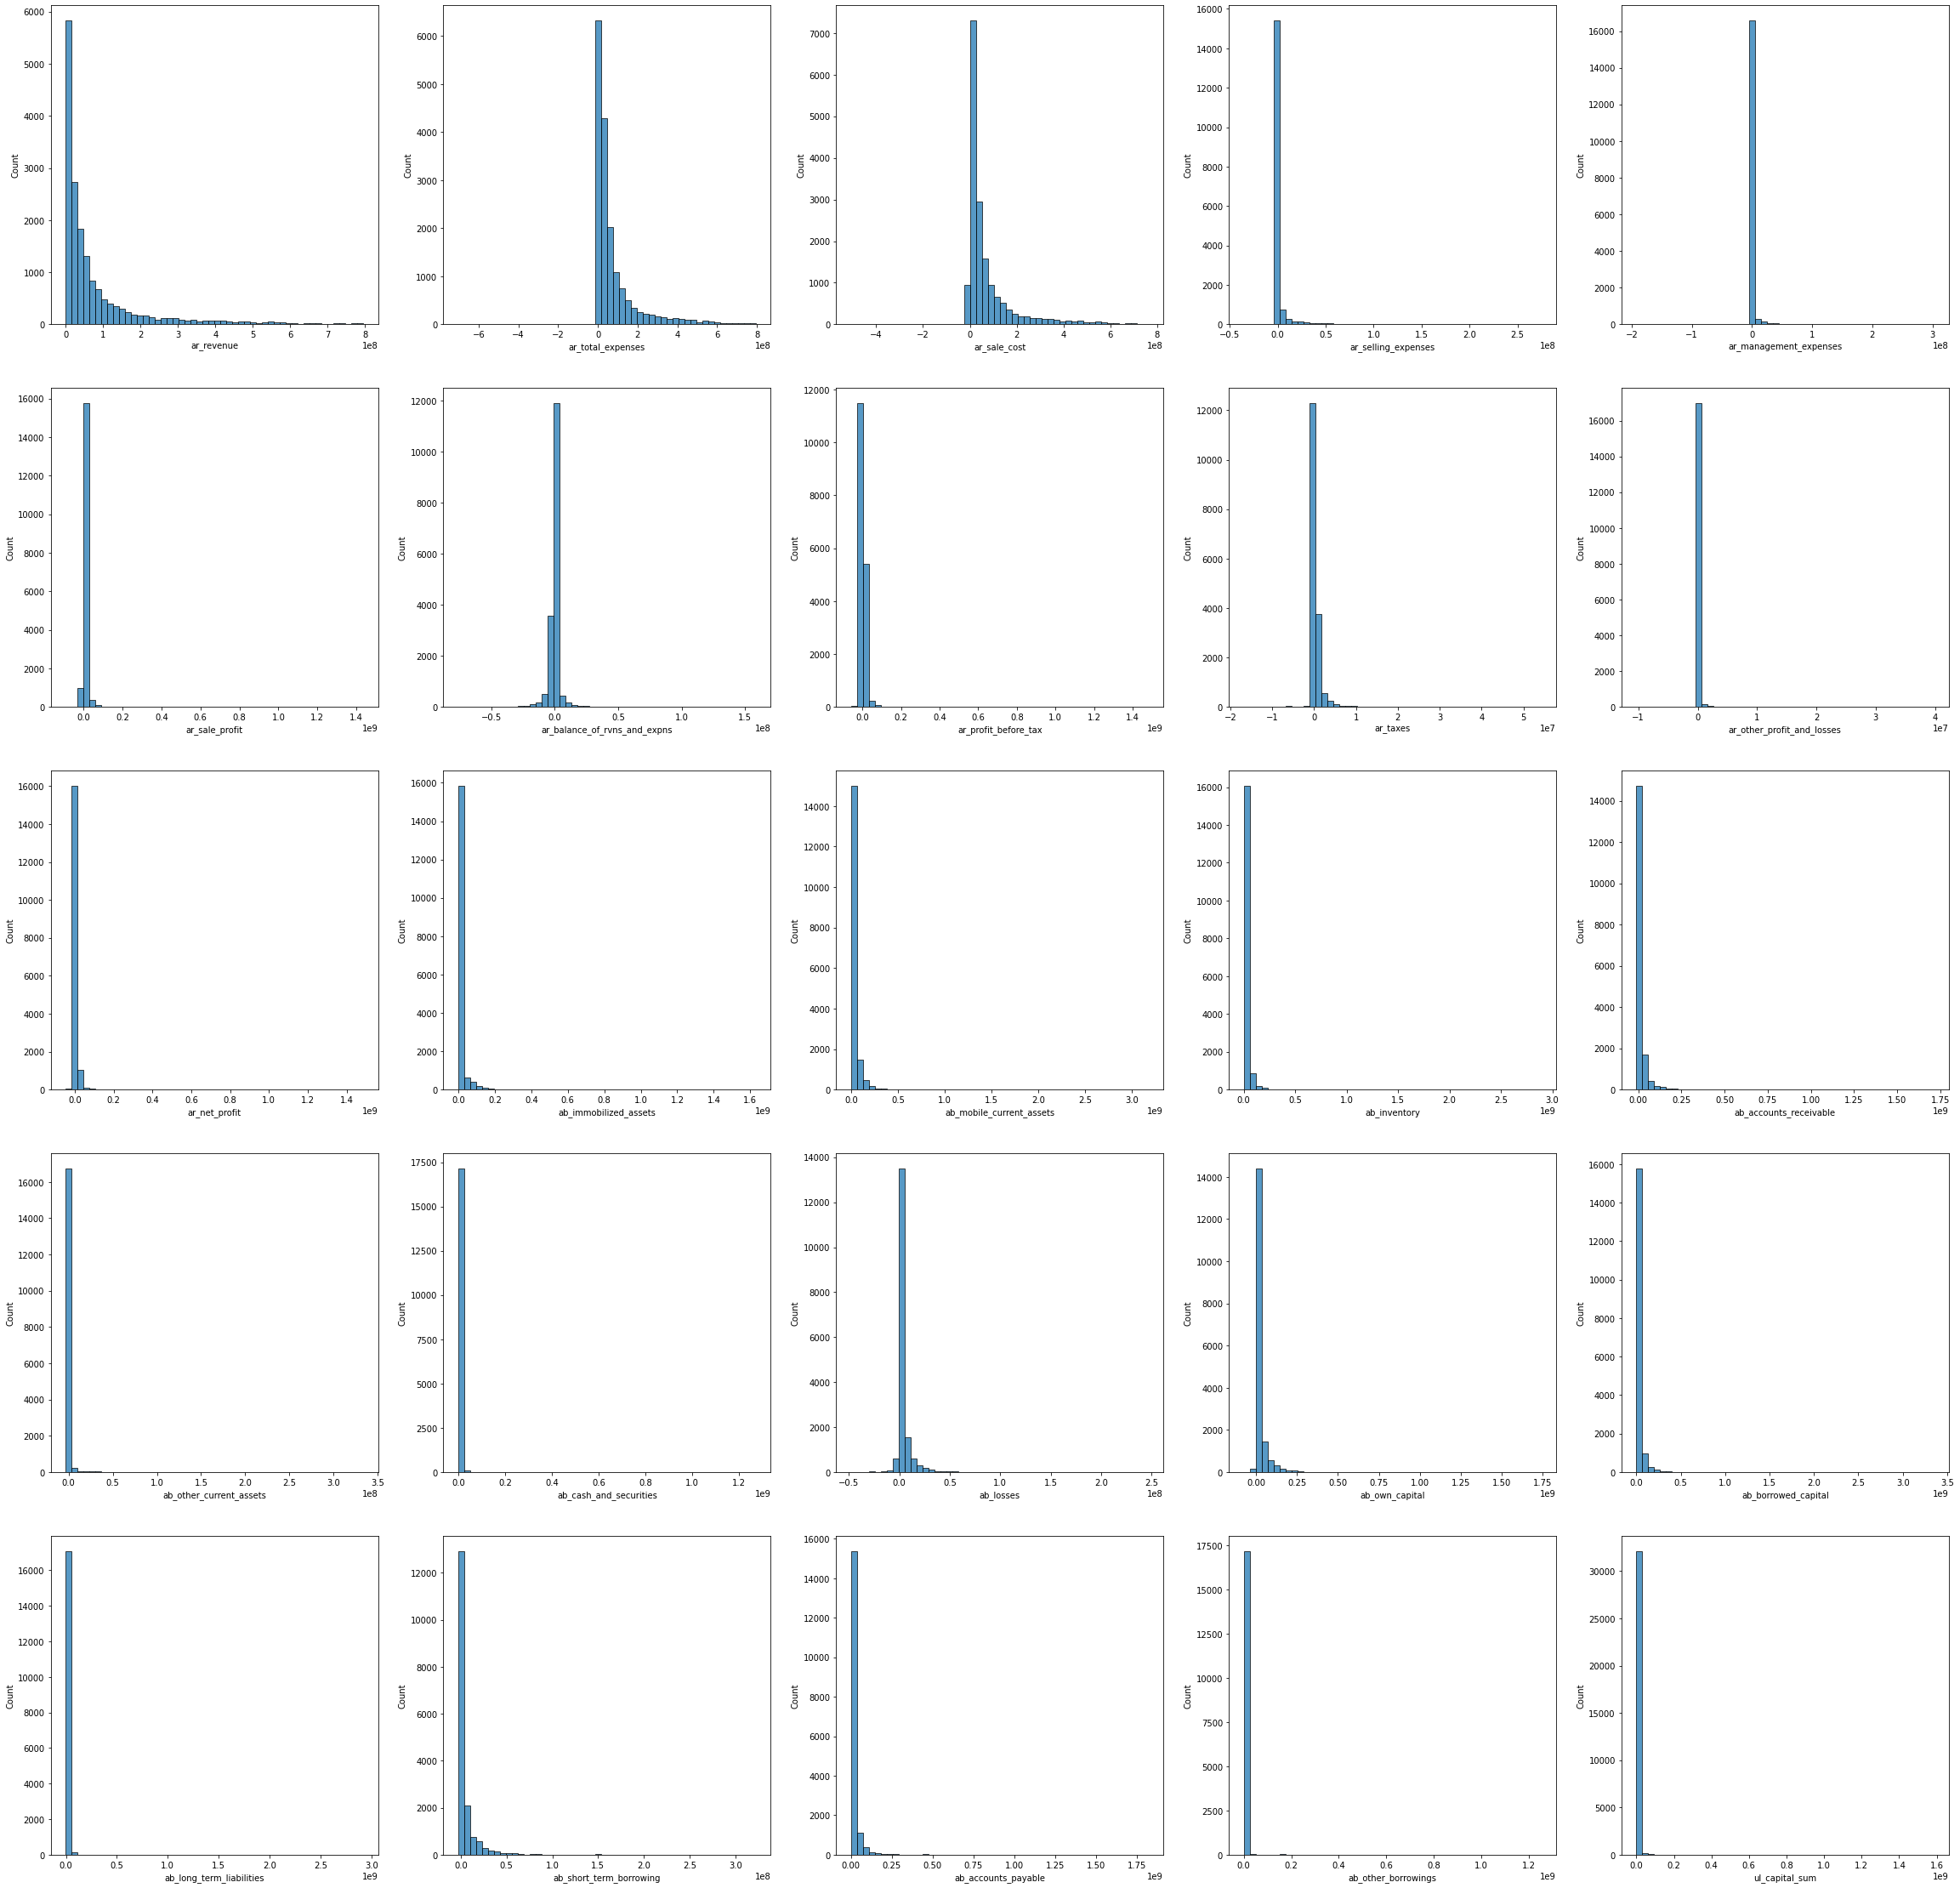

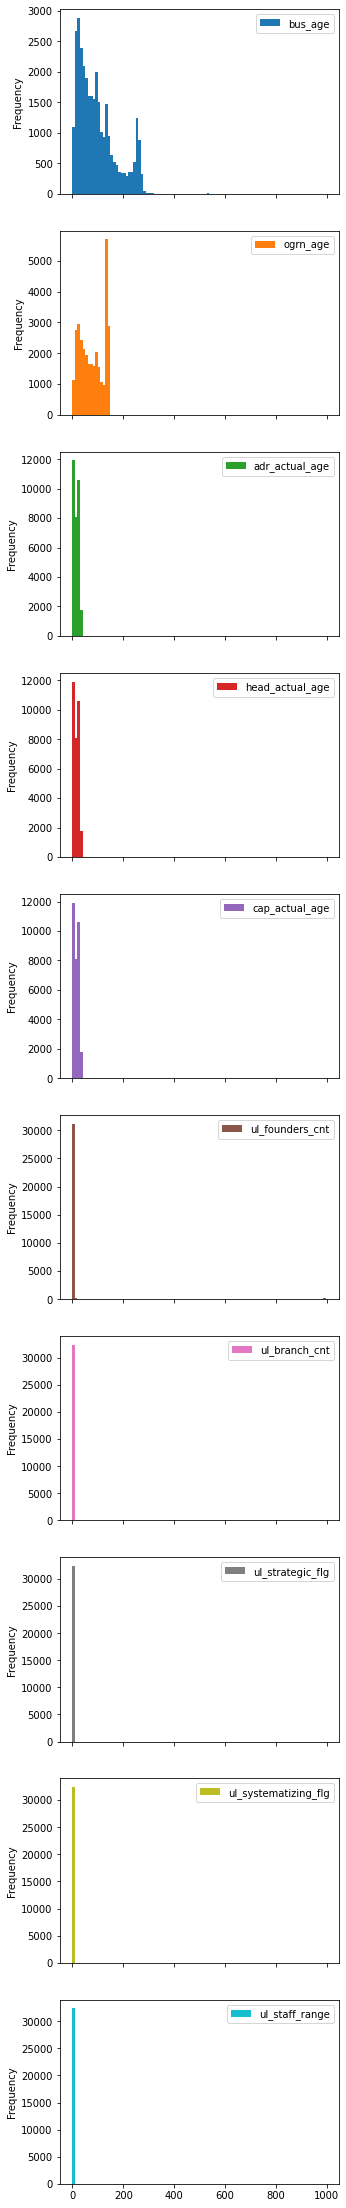

In [18]:
f, axes = plt.subplots(5, 5, figsize=(40, 40))
for i in range(len(real_features)):
    sns.histplot(train[real_features[i]].dropna(), bins=50, ax=axes[i // 5, i % 5])

train[discrete_features + cat_features].plot.hist(subplots=True, figsize=(5, 40), bins=100)

Многомерным нормальным распределением данную выборку описать нельзя, многие признаки, скорее всего, описываются другими видами распределений

## Визуализируем признаки попарно

Перемешаем выборку, так как далее будем использовать лишь часть всех объектов для визуализации.
Это необходимо сделать, чтобы в новую выборку попало больше разнообразных объектов.

In [19]:
from sklearn.utils import shuffle
strain = shuffle(train, random_state=321)

Выделим 300 объектов для попарного отображения признаков. Это сэкономит время работы и будет достаточным для того, чтобы увидеть общую зависимость.

Так как выборка несбалансированная, и количество объектов с целевым признаком, равным 1, крайне мало, то необходимо отсортировать выделенные объекты по данному признаку.  Такая сортировка позволит отобразить объекты с "default_12m", равным 1, поверх остальных объектов.

Сначала отобразим дискретные и категориальные величины

c:\my files\python\pythonproject\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\my files\python\pythonproject\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\my files\python\pythonproject\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\my files\python\pythonproject\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


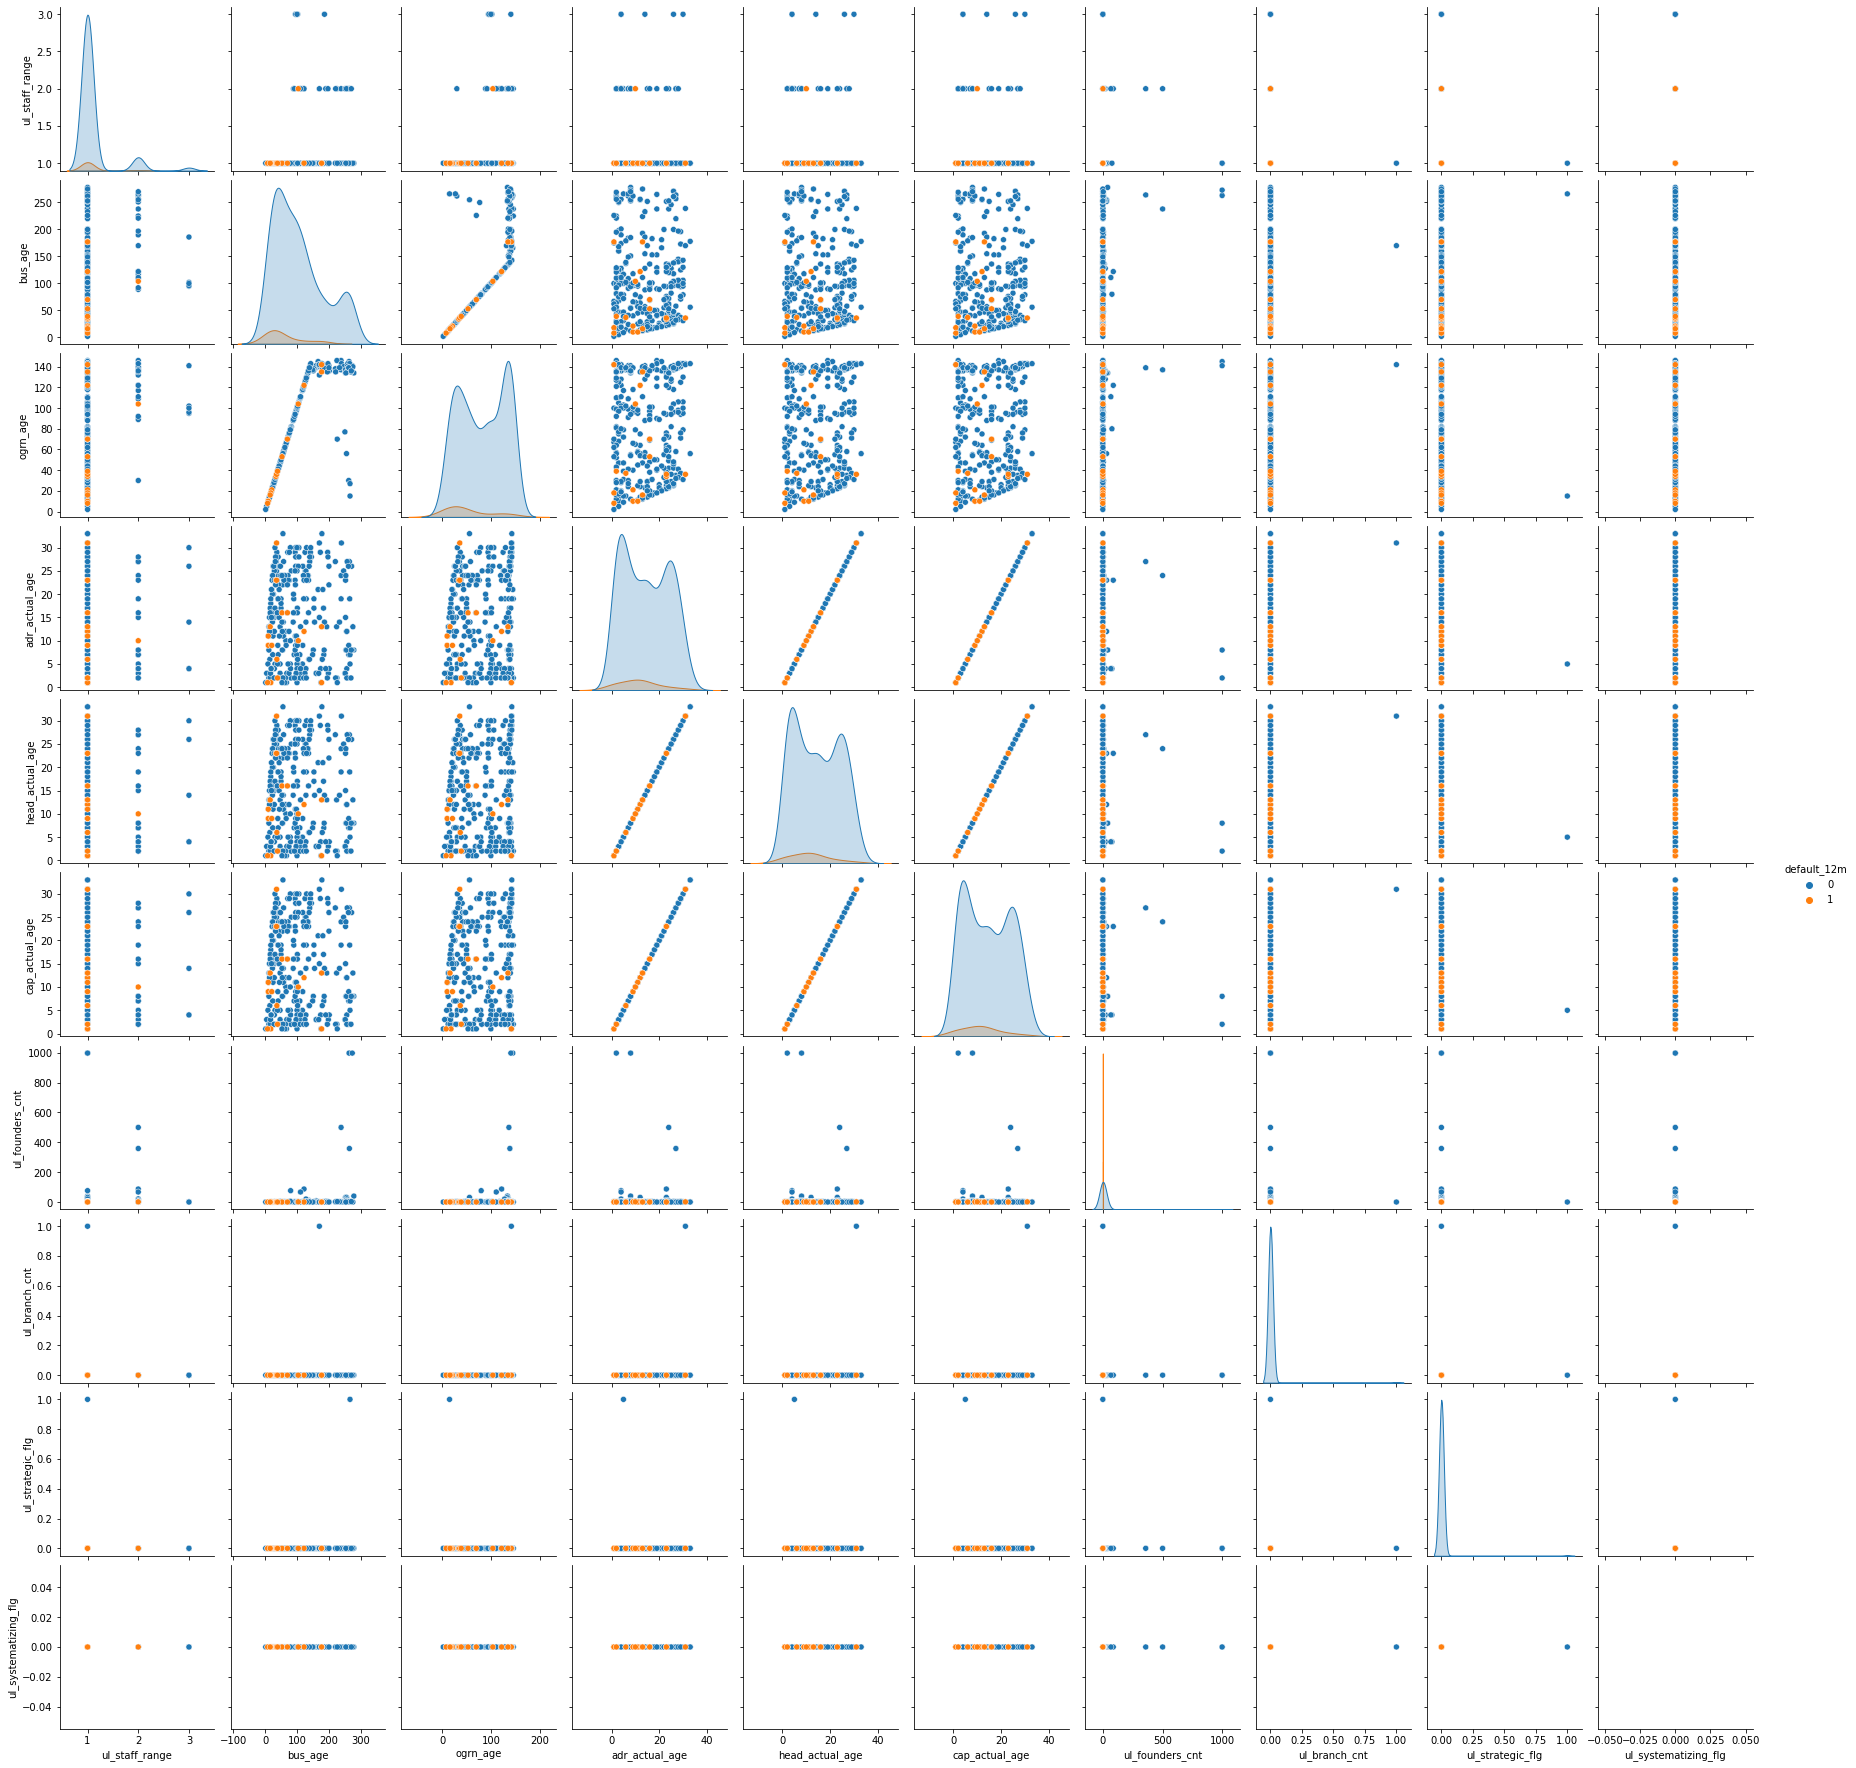

In [20]:
sns.pairplot(train[cat_features + discrete_features + ["default_12m"]][:300].sort_values("default_12m"),
        hue="default_12m", diag_kind="kde", dropna=True)

Отобразим вещественные величины

c:\my files\python\pythonproject\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\my files\python\pythonproject\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\my files\python\pythonproject\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


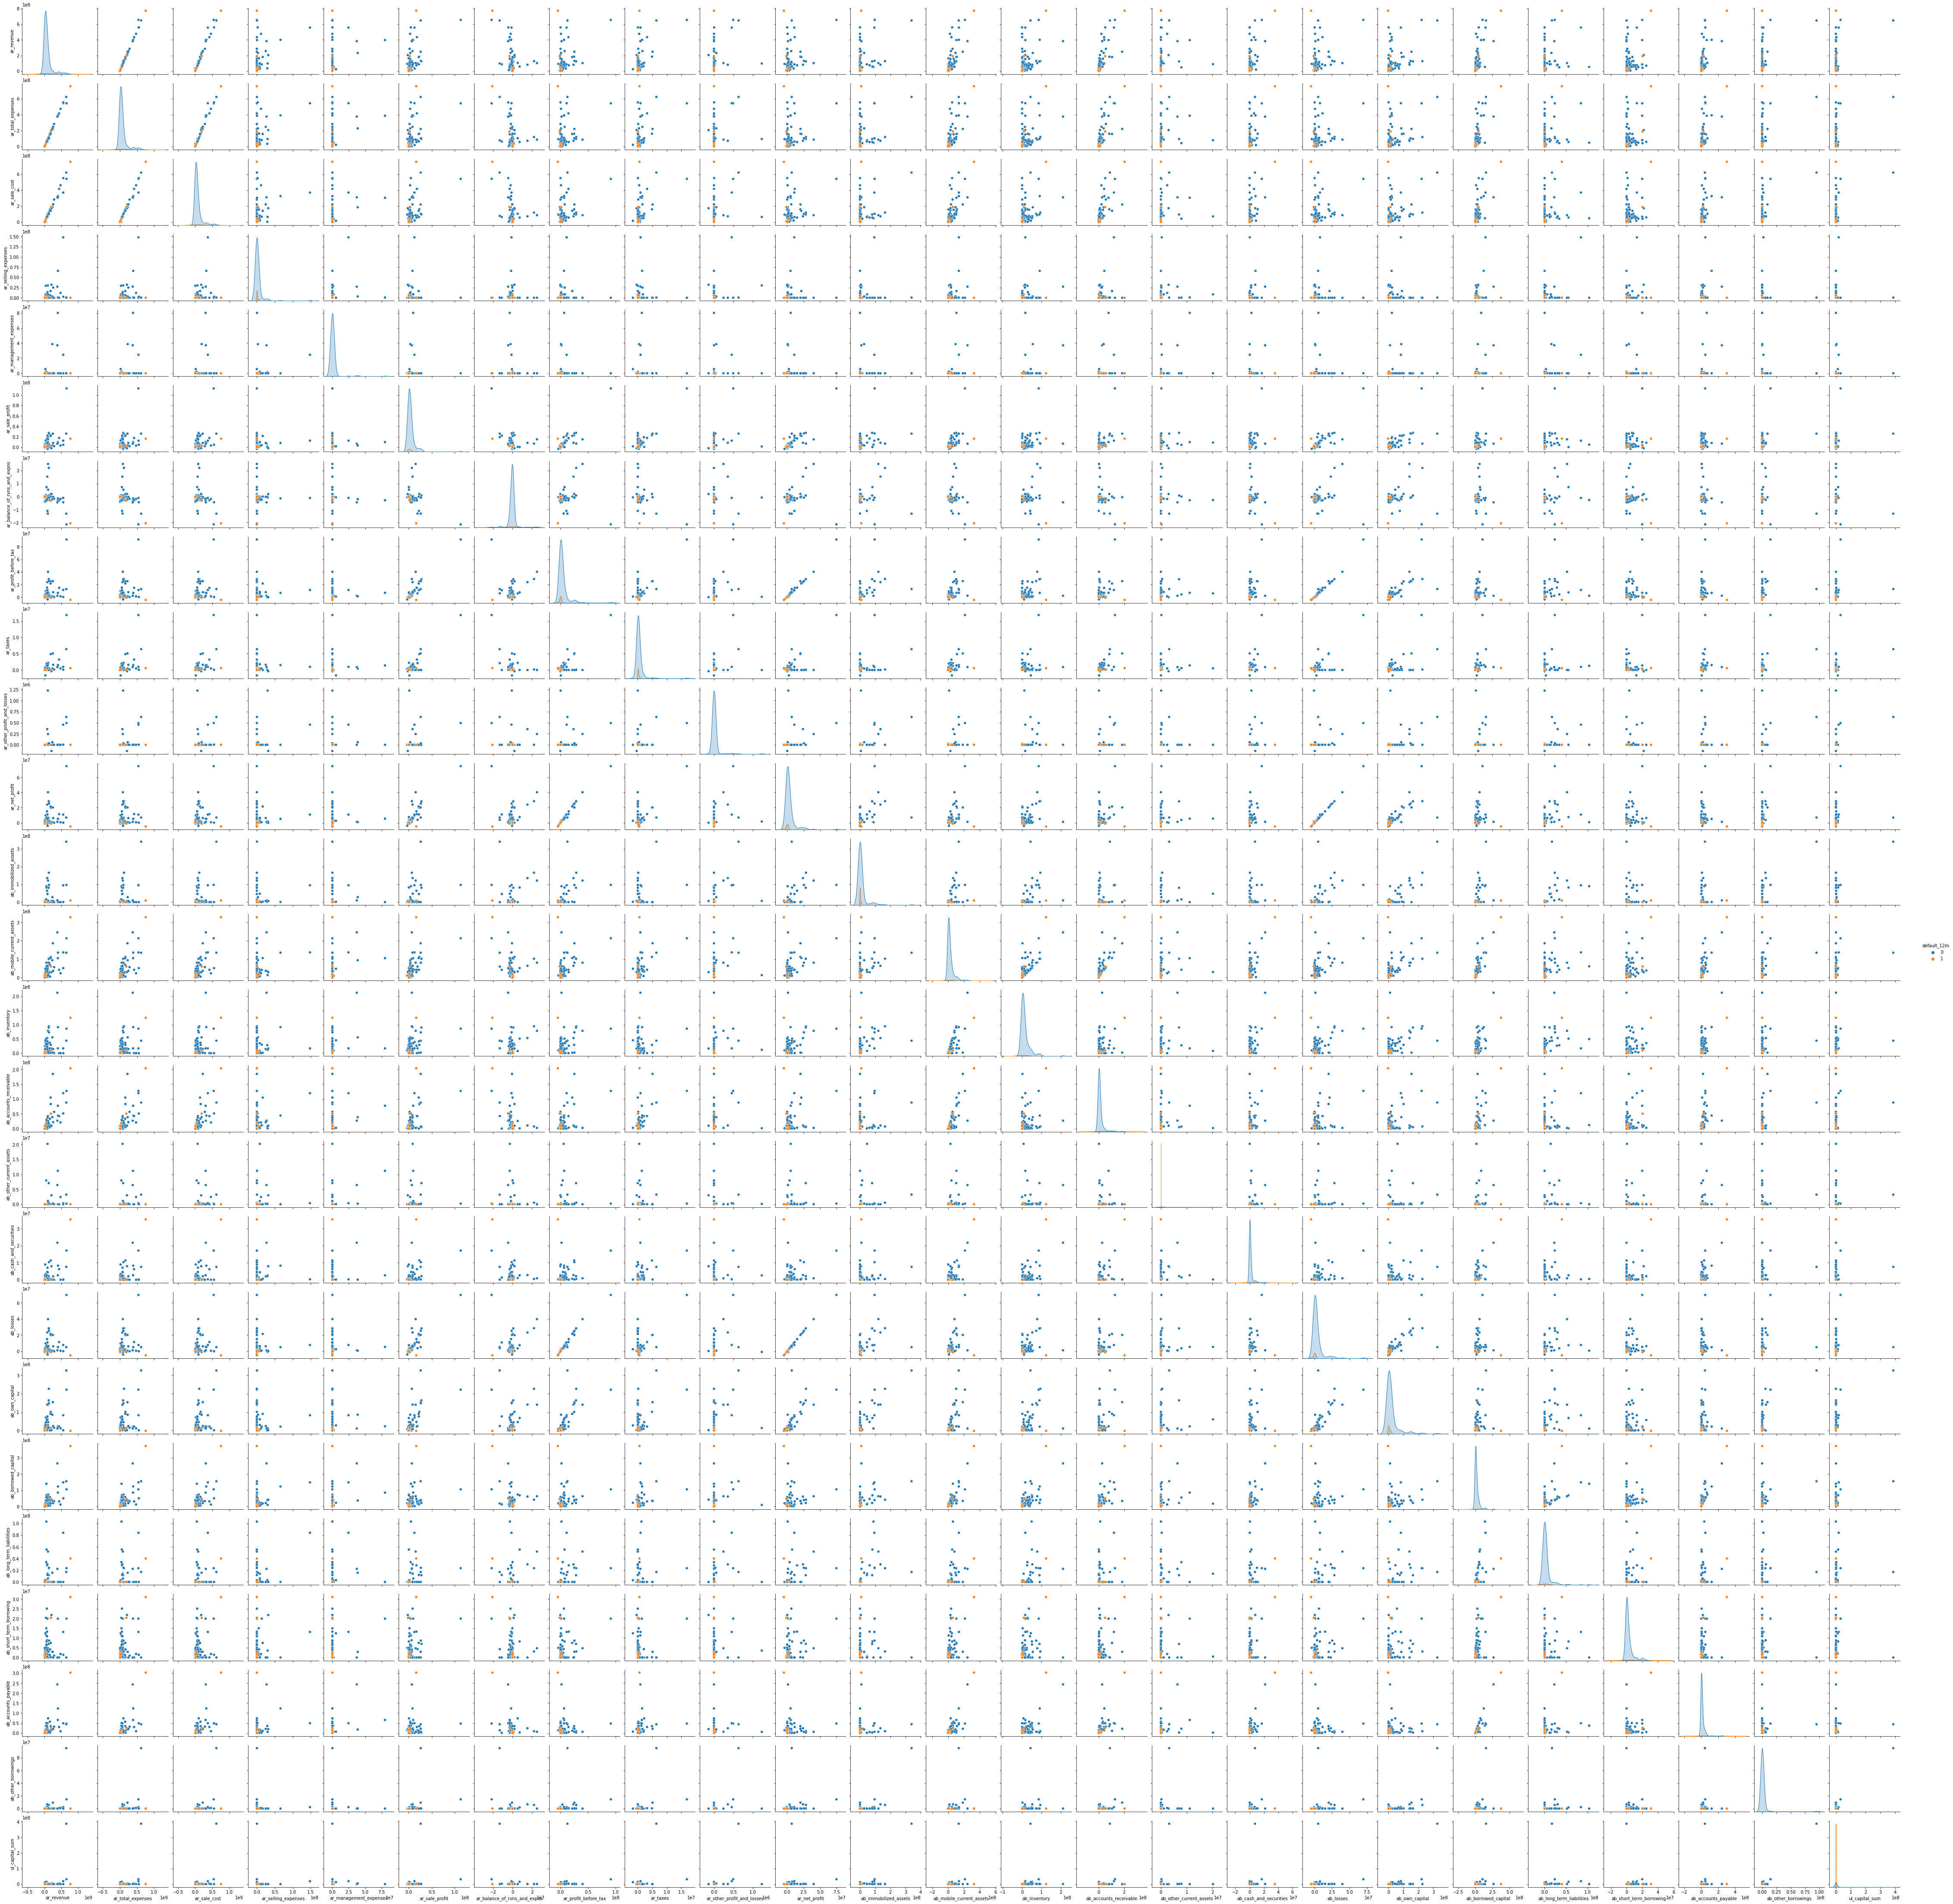

In [21]:
sns.pairplot(train[real_features + ["default_12m"]][:300].sort_values("default_12m"),
        hue="default_12m", diag_kind="kde", dropna=True)

Можно заметить, что пары признаков сконцентрированы на диагоналях, прямых или образуют некоторые скопления, т.е. признаки как-то связаны.

Так же стоит обратить внимание на то, что присутствуют точки-выбросы.

## Корреляция

Посмотрим на корреляции признаков, чтобы узнать, не нужно ли удалять какие-то признаки перед построением модели.

Для целочисленных признаков и категориальных корреляцию вычислим через коэффициент энтропии.

<AxesSubplot:>

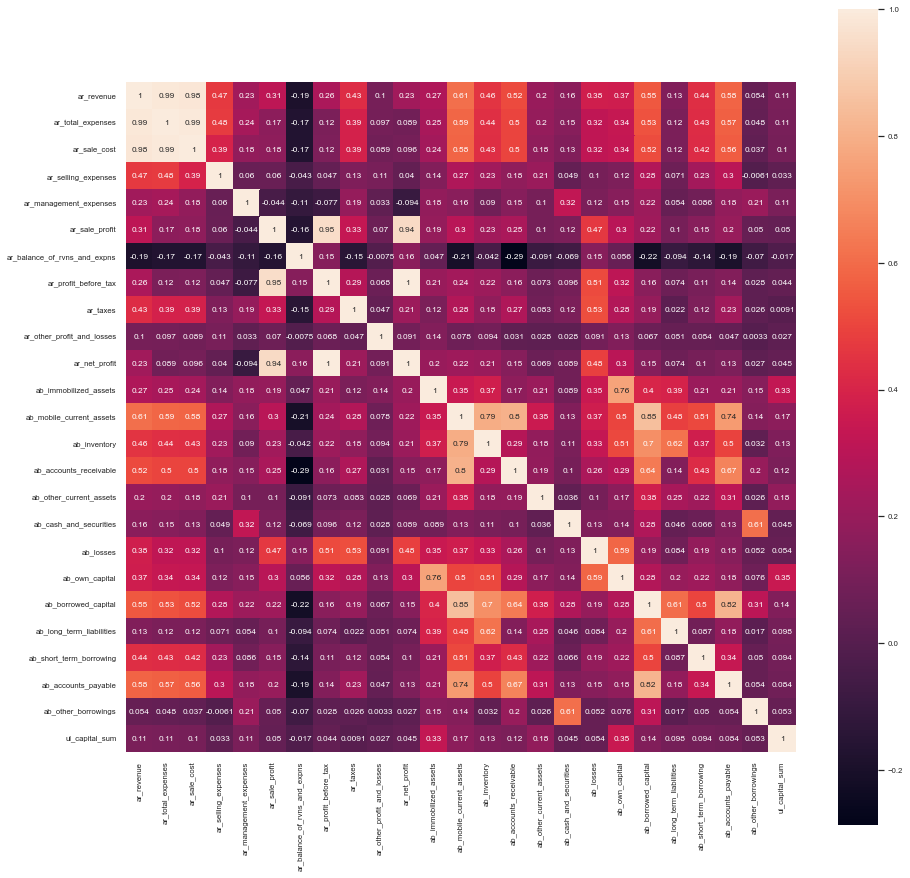

In [22]:
sns.set(font_scale=0.7)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(train[real_features].corr(), square=True, annot=True)

c:\my files\python\pythonproject\lib\site-packages\pandas\core\frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


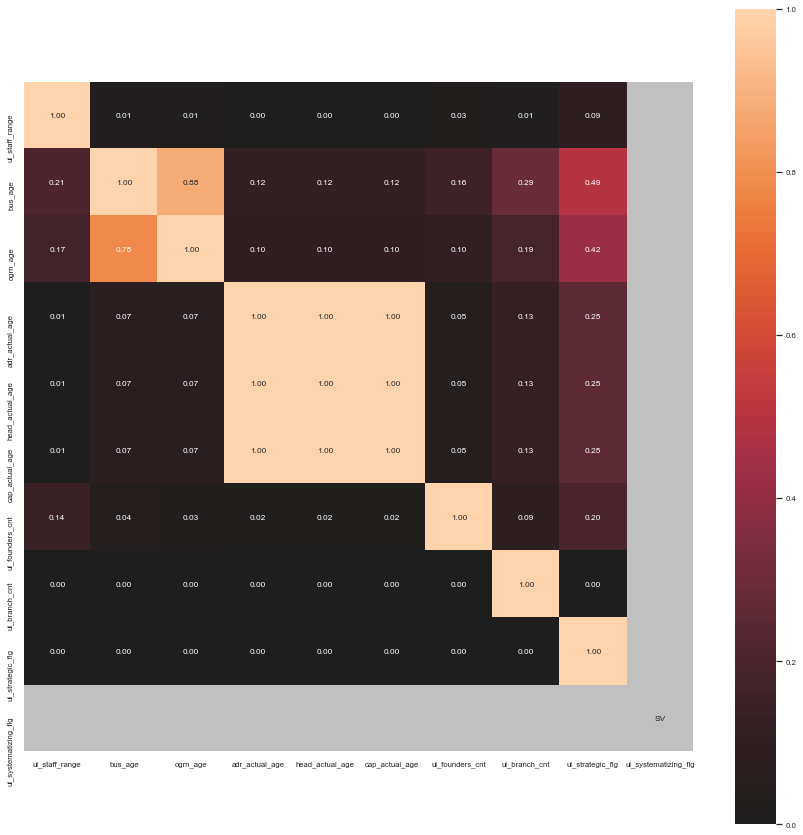

{'corr':                       ul_staff_range   bus_age  ogrn_age  adr_actual_age  \
 ul_staff_range              1.000000  0.013626  0.012135        0.000616   
 bus_age                     0.210231  1.000000  0.880377        0.116044   
 ogrn_age                    0.166570  0.783227  1.000000        0.095317   
 adr_actual_age              0.005979  0.072989  0.067389        1.000000   
 head_actual_age             0.005979  0.072989  0.067389        1.000000   
 cap_actual_age              0.005979  0.072989  0.067389        1.000000   
 ul_founders_cnt             0.137271  0.041833  0.030362        0.018754   
 ul_branch_cnt               0.002543  0.003672  0.002655        0.002604   
 ul_strategic_flg            0.000247  0.000087  0.000083        0.000071   
 ul_systematizing_flg        0.000000  0.000000  0.000000        0.000000   
 
                       head_actual_age  cap_actual_age  ul_founders_cnt  \
 ul_staff_range               0.000616        0.000616         0.034

In [23]:
from dython import nominal

nominal.associations(train[cat_features + discrete_features], nominal_columns='all', theil_u=True, figsize=(15,15))

Заметим, что для ul_systematizing_flg корреляция не была подсчитана.
Можно предположить, что данный признак константный. Проверим это.

In [24]:
train["ul_systematizing_flg"].squeeze().unique()

array([0], dtype=int64)

In [25]:
test["ul_systematizing_flg"].squeeze().unique()

array([0], dtype=int64)

Данный признак принимает значение 0 на тестовой и обучающей выборке, значит в дальнейшем мы от него избавимся.

## Визуализация с помощью понижения размерности

Уберем объекты, имеющие null объекты. Они будут мешать визуализации. Нормируем и визуализируем подвыборку. Это позволит увидеть общие закономерности за короткое время.

In [26]:
from sklearn.preprocessing import scale, StandardScaler

subset_l  = 3000
objects_with_nan = strain.index[np.any(np.isnan(strain.values), axis=1)]
strain_subset = StandardScaler().fit_transform(strain.drop(objects_with_nan, axis=0)[:subset_l])
target_subset = strain["default_12m"].drop(objects_with_nan, axis=0)[:subset_l]

In [27]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm # импортируем цветовые схемы, чтобы рисовать графики.

tsne_representation = TSNE(random_state=321).fit_transform(strain_subset)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


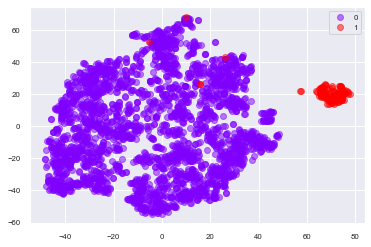

In [28]:
colors = cm.rainbow(np.linspace(0, 1, len(set(target_subset))))
for y, c in zip(set(target_subset), colors):
    plt.scatter(tsne_representation[target_subset.values==y, 0],
                tsne_representation[target_subset.values==y, 1], c=c, alpha=0.5, label=str(y))
plt.legend()

Данная визуализация получилась очень хорошей. Объекты с целевым признаком 1 хорошо отделяются от остальных объектов.

# Предобработка данных

## Удалим константный признак "ul_systematizing_flg" и 'record_id'

In [29]:
discrete_features.remove("ul_systematizing_flg")
train = train.drop("ul_systematizing_flg", axis=1).drop('record_id', axis=1)

In [30]:
test = test.drop("ul_systematizing_flg", axis=1)

## Обработаем совпадающие признаки

Корреляция показала, что значения в следующих группах признаков (ar_total_expenses и ar_sale_cost, ar_profit_before_tax и ar_net_profit, cap_actual_age, adr_actual_age и head_actual_age, ) совпадают

In [31]:
#ar_sale_cost
train = train.drop("ar_sale_cost", axis=1)
test = test.drop("ar_sale_cost", axis=1)

#ar_net_profit
train = train.drop("ar_net_profit", axis=1)
test = test.drop("ar_net_profit", axis=1)

#ar_sale_profit
train = train.drop("ar_sale_profit", axis=1)
test = test.drop("ar_sale_profit", axis=1)

#cap_actual_age, adr_actual_age
train = train.drop("adr_actual_age", axis=1)
test = test.drop("adr_actual_age", axis=1)

train = train.drop("cap_actual_age", axis=1)
test = test.drop("cap_actual_age", axis=1)

In [32]:
#create new feature - mean of bus_ag and ogrn_age. save it like bus_age
train['bus_age'] = round((train['bus_age'] + train['ogrn_age']) / 2)
test['bus_age'] = round((test['bus_age'] + test['ogrn_age']) / 2)

In [33]:
#delete ogrn_age
train = train.drop('ogrn_age', axis=1)
test = test.drop('ogrn_age', axis=1)

In [34]:
real_features.remove('ar_sale_cost')
real_features.remove('ar_sale_profit')
real_features.remove('ar_net_profit')

discrete_features.remove('ogrn_age')
discrete_features.remove('cap_actual_age')
discrete_features.remove('adr_actual_age')

Данные обладают большим количеством пропусков, было бы разумно обучить модель только на объектах без пропусков, но тестовая выборка тоже содержит пропуски, поэтому нужно их обработать.

Заполним null объекты с целевым признаком равным 1 - средним среди всех объектов со значением 1 таргет-признака, и 0 - для объектов со значением 0 для таргет признака.
Заполним null объекты в тестовой выборке средним по каждому признаку.

In [35]:
for feature in train.columns.values:
    train[feature] = train[feature].fillna(train.groupby('default_12m')[feature].transform('mean'))

In [36]:
for i, feature in enumerate(test.columns.values):
    test[feature].fillna(np.nanmean(test[feature]), inplace=True)

## Отделим record_id от test-сэмпла

In [37]:
test_id = test["record_id"]
test = test.drop("record_id", axis=1)

## Отделим целевой признак от датасета

In [38]:
y = train['default_12m']

In [39]:
train = train.drop('default_12m', axis=1)

## Стандартизация данных

In [40]:
scaler = StandardScaler()
scale_train = scaler.fit_transform(train)

In [41]:
scale_train = pd.DataFrame(scale_train)

In [42]:
scale_test = scaler.fit_transform(test)
scale_test = pd.DataFrame(scale_test)

In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture

## Выделим 3 фолда для кросс-валидации

In [44]:
features = scale_train.columns.values
kf3 = StratifiedKFold(n_splits=3, shuffle=True, random_state=321)

# Модели

## Линейная регрессия

In [45]:
clf = LogisticRegression(random_state=321, solver='saga', class_weight='balanced', warm_start=True)

In [46]:
i = 1
for train_index, test_index in kf3.split(scale_train, y):
    X_train = scale_train.iloc[train_index].loc[:, features]
    X_test = scale_train.iloc[test_index][features]
    y_train = y.iloc[train_index]
    y_test = y.loc[test_index]

    #Train the model
    clf.fit(X_train, y_train)
    print(f"classification_report for the fold no. {i} on the test set: {classification_report(y_test, clf.predict(X_test))}")

c:\my files\python\pythonproject\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\my files\python\pythonproject\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
c:\my files\python\pythonproject\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


classification_report for the fold no. 1 on the test set:               precision    recall  f1-score   support

           0       0.99      0.74      0.85     10102
           1       0.19      0.86      0.31       697

    accuracy                           0.75     10799
   macro avg       0.59      0.80      0.58     10799
weighted avg       0.94      0.75      0.81     10799

classification_report for the fold no. 1 on the test set:               precision    recall  f1-score   support

           0       0.99      0.73      0.84     10101
           1       0.19      0.89      0.31       697

    accuracy                           0.74     10798
   macro avg       0.59      0.81      0.57     10798
weighted avg       0.94      0.74      0.81     10798

classification_report for the fold no. 1 on the test set:               precision    recall  f1-score   support

           0       0.99      0.72      0.83     10101
           1       0.18      0.86      0.29       697

    accu

## SVM

In [47]:
clf = SVC(random_state=321, class_weight='balanced')

In [48]:
i = 1
for train_index, test_index in kf3.split(scale_train, y):
    X_train = scale_train.iloc[train_index].loc[:, features]
    X_test = scale_train.iloc[test_index][features]
    y_train = y.iloc[train_index]
    y_test = y.loc[test_index]

    #Train the model
    clf.fit(X_train, y_train)
    print(f"classification_report for the fold no. {i} on the test set: {classification_report(y_test, clf.predict(X_test))}")

classification_report for the fold no. 1 on the test set:               precision    recall  f1-score   support

           0       0.99      0.79      0.88     10102
           1       0.23      0.88      0.36       697

    accuracy                           0.80     10799
   macro avg       0.61      0.84      0.62     10799
weighted avg       0.94      0.80      0.85     10799

classification_report for the fold no. 1 on the test set:               precision    recall  f1-score   support

           0       0.99      0.79      0.88     10101
           1       0.23      0.90      0.37       697

    accuracy                           0.80     10798
   macro avg       0.61      0.85      0.62     10798
weighted avg       0.94      0.80      0.85     10798

classification_report for the fold no. 1 on the test set:               precision    recall  f1-score   support

           0       0.99      0.77      0.86     10101
           1       0.21      0.89      0.34       697

    accu

## KNN

In [49]:
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')

In [50]:
i = 1
for train_index, test_index in kf3.split(scale_train, y):
    X_train = scale_train.iloc[train_index].loc[:, features]
    X_test = scale_train.iloc[test_index][features]
    y_train = y.iloc[train_index]
    y_test = y.loc[test_index]

    #Train the model
    clf.fit(X_train, y_train)
    print(f"classification_report for the fold no. {i} on the test set: {classification_report(y_test, clf.predict(X_test))}")

classification_report for the fold no. 1 on the test set:               precision    recall  f1-score   support

           0       0.98      0.99      0.98     10102
           1       0.82      0.66      0.73       697

    accuracy                           0.97     10799
   macro avg       0.90      0.83      0.86     10799
weighted avg       0.97      0.97      0.97     10799

classification_report for the fold no. 1 on the test set:               precision    recall  f1-score   support

           0       0.98      0.99      0.98     10101
           1       0.81      0.66      0.73       697

    accuracy                           0.97     10798
   macro avg       0.89      0.82      0.85     10798
weighted avg       0.97      0.97      0.97     10798

classification_report for the fold no. 1 on the test set:               precision    recall  f1-score   support

           0       0.98      0.99      0.98     10101
           1       0.83      0.68      0.75       697

    accu

# Поиск Аномалий

Попробуем решить задачу с помощью метода максимального правдоподобия

In [51]:
import scipy
from scipy import stats

In [52]:
def get_best_distribution(data):
    dist_names = ["norm", "exponweib", "weibull_max", "weibull_min"]
    dist_results = []
    params = {}
    for dist_name in dist_names:
        dist = getattr(scipy.stats, dist_name)
        param = dist.fit(data)

        params[dist_name] = param
        # Applying the Kolmogorov-Smirnov test
        D, p = scipy.stats.kstest(data, dist_name, args=param)
        dist_results.append((dist_name, p))

    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))

    # store the name of the best fit and its p value

    return best_dist, best_p, params[best_dist]

In [53]:
best_distribution_feature = []
for feature in features[:-1]:
    best_dist, _, params = get_best_distribution(scale_train[feature].iloc[scale_train.groupby(y).groups[0]])
    best_distribution_feature.append((feature, best_dist, params))

c:\my files\python\pythonproject\lib\site-packages\scipy\stats\_continuous_distns.py:1678: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


Один признак имеет распределение Бернулли

In [54]:
p = 0
for i in train['ul_strategic_flg'].iloc[scale_train.groupby(y).groups[0]].squeeze():
    if i == 1:
        p += 1
p = p / len(train['ul_strategic_flg'].squeeze())

best_distribution_feature.append((27, 'bernoulli', p))

In [55]:
def row_likelihood(row, feature_dist):
    row_likelihood = 1
    for feature, dist, params in feature_dist:
        if dist == 'norm':
            pdf = scipy.stats.norm(params[0], params[1]).pdf(row[feature])
        if dist == 'exponweib':
            pdf = scipy.stats.exponweib(params[0], params[1], params[2], params[3]).pdf(row[feature])
        if dist == 'bernoulli':
            pdf = scipy.stats.bernoulli(params).pmf(row[feature])
        if pdf != 0:
            row_likelihood *= pdf
    return row_likelihood

def max_likelihood(x, feature_dist):
    likelihood = []
    for i in range(x.shape[0]):
        row = x.loc[i]
        likelihood.append(row_likelihood(row, feature_dist))
    return likelihood

In [56]:
MLE = max_likelihood(scale_train, best_distribution_feature)

In [57]:
print(classification_report(y, [0 if likelyhood > 1e-13 else 1 for likelyhood in MLE]))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87     30304
           1       0.02      0.06      0.03      2091

    accuracy                           0.77     32395
   macro avg       0.48      0.44      0.45     32395
weighted avg       0.87      0.77      0.82     32395



# Result

In [58]:
answer = pd.DataFrame(test_id)
answer['id'] = answer['record_id']
answer.drop('record_id',axis=1, inplace=True)

In [59]:
answer['predict'] = clf.predict(scale_test)

In [60]:
answer.to_csv('PD-submit.csv',index=False, sep=';')